In [68]:
%%writefile mean.csv

Network, $c\mu$, MW, MP, FP, PPO, PPO (BC), PPO (WC)
Criss Cross, 16.16, 15.32, 8370.00, 29.32, 8650.00, 24.01, 15.43
Reentrant-1[Exp] 2, 18.98, 14.81, 5000.00, 1020.00, 1800.00, 25.1, 13.6
Reentrant-1[Exp] 3, 21.61, 24.83, 25000.00, 8100.00, 10300.00, 48.2, 22.6
Reentrant-1[Exp] 4, 30.15, 32.09, 40000.00, 4320.00, 17500.00, 183.4, 29.7
Reentrant-1[Exp] 5, 51.27, 50.01, 50000.00, 9770.00, 26500.00, 135.2, 38.7
Reentrant-1[Exp] 6, 54.73, 49.24, 100000.00, 12300.00, 59300.00, 358.0, 4.85
Reentrant-1[Exp] 7, 56.36, 54.41, 50000.00, 29700.00, 43900.00, 526.6, 56.3
Reentrant-1[Exp] 8, 59.41, 67.99, 150000.00, 17800.00, 59300.00, 868.5, 65.8
Reentrant-1[Exp] 9, 72.70, 64.41, 150000.00, 53500.00, 112000.00, 1304.5, 75.8
Reentrant-1[Exp] 10, 87.69, 80.08, 200000.00, 63200.00, 166000.00, 3809.1, 83.1
Reentrant-2[Exp] 2, 26.01, 17.45, 24900.00, 1.76, 9040.00, 30.62, 13.72
Reentrant-2[Exp] 3, 26.27, 26.65, 40000.00, 2120.00, 18200.00, 48.59, 22.09
Reentrant-2[Exp] 4, 27.62, 34.10, 39900.00, 5540.00, 17700.00, 79.20, 29.90
Reentrant-2[Exp] 5, 44.82, 40.34, 49900.00, 9720.00, 25800.00, 91.65, 38.01
Reentrant-2[Exp] 6, 54.48, 46.63, 100000.00, 16500.00, 40200.00, 526.57, 46.80
Reentrant-2[Exp] 7, 70.25, 77.93, 99800.00, 13900.00, 57800.00, 352.02, 55.51
Reentrant-2[Exp] 8, 70.32, 72.96, 100000.00, 27300.00, 47900.00, 1332.68, 63.15
Reentrant-2[Exp] 9, 65.80, 77.34, 100000.00, 65300.00, 65400.00, 1574.86, 70.30
Reentrant-2[Exp] 10, 81.35, 82.00, 150000.00, 93600.00, 81100.00, 1876.54, 80.36
Reentrant-1[Hyper] 2, 17500.00, 17500.00, 25100.00, 12100.00, 9900.00, 62.66, 29.94
Reentrant-1[Hyper] 3, 25400.00, 25500.00, 40000.00, 11900.00, 19600.00, 305.05, 47.45
Reentrant-1[Hyper] 4, 23700.00, 23600.00, 40100.00, 884.00, 18900.00, 167.20, 64.39
Reentrant-1[Hyper] 5, 40700.00, 40600.00, 75000.00, 242000.00, 48000.00, 913.39, 81.80
Reentrant-1[Hyper] 6, 50200.00, 50700.00, 99900.00, 194000.00, 59100.00, 2383.03, 99.77
Reentrant-1[Hyper] 7, 47100.00, 47300.00, 99800.00, 317000.00, 65400.00, 3054.62, 118.20
Reentrant-2[Hyper] 2, 16400.00, 20000.00, 25000.00, 22200.00, 9750.00, 66.87, 30.67
Reentrant-2[Hyper] 3, 22700.00, 29100.00, 39900.00, 31900.00, 20500.00, 482.64, 45.66
Reentrant-2[Hyper] 4, 20300.00, 26700.00, 40000.00, 28900.00, 19300.00, 149.23, 61.09
Reentrant-2[Hyper] 5, 22600.00, 30600.00, 49900.00, 33300.00, 25600.00, 371.65, 77.98
Reentrant-2[Hyper] 6, 41600.00, 57700.00, 100000.00, 61700.00, 67100.00, 1363.93, 93.84
Reentrant-2[Hyper] 7, 38100.00, 53800.00, 99900.00, 57100.00, 65400.00, 2317.88, 110.48
N Model, 171000.00, 40.22, 40.22, 798.00, 8820.00, 100.89, 44.29
5x5 Time-Varying, 17.81, 15.19, 15.19, 26.65, 12200.00, 25.17, 16.82
Input Switch, 5.30, 5.60, 4940.00, 4940.00, 7290.00, 11.80, 5.32
Hospital, 444.00, 444.00, 444.00, 1520.00, 24400.00, 24700.00, 23300.00


Overwriting mean.csv


In [69]:
import pandas as pd

mean_df = pd.read_csv('mean.csv')
# std_df = pd.read_csv('std.csv')


In [19]:
# Replace all mean_df zero values with mean of each row
mean_df[mean_df.columns[1:]] = mean_df[mean_df.columns[1:]].apply(lambda x: x.replace(0, x.mean()), axis=1)


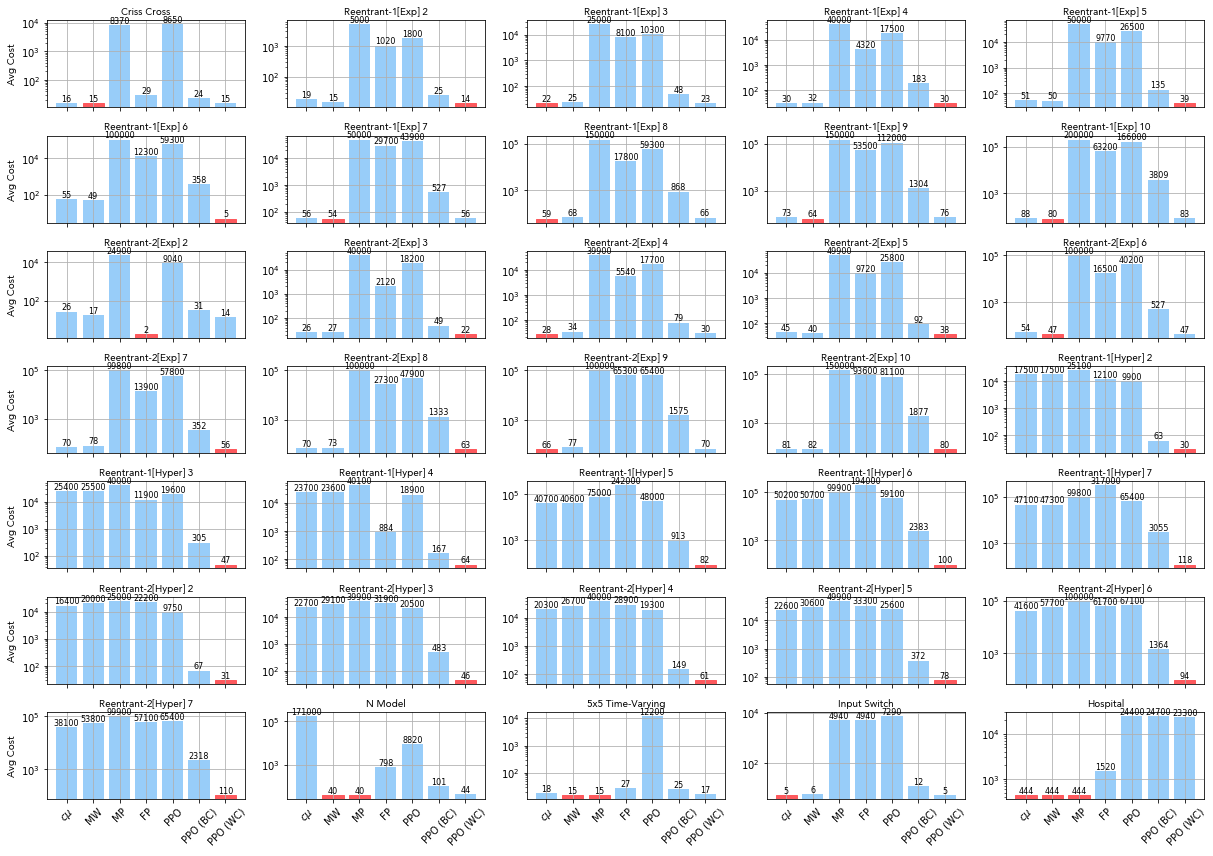

In [70]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font = FontProperties(fname='/user/hc3295/queue-learning/misc/Avenir Regular.ttf')

networks = mean_df['Network'].unique()
policies = mean_df.columns[1:]

fig, axs = plt.subplots(7, 5, figsize=(17, 12), sharex=True)
axs = axs.flatten()

for i, network in enumerate(networks):
    network_mean = mean_df[mean_df['Network'] == network].iloc[0, 1:].values
    # network_std = std_df[std_df['Network'] == network].iloc[0, 1:].values
    
    bars = axs[i].bar(policies, network_mean, capsize=4, color='#98CDF9')
    min_val = network_mean.min()
    for j, v in enumerate(network_mean):
        if v == min_val:
            bars[j].set_color('#FD595D')
    
    axs[i].set_title(network, fontproperties=font)
    axs[i].set_yscale('log')
    axs[i].tick_params(axis='x', rotation=45, labelsize=10)
    axs[i].tick_params(axis='y', labelsize=10)
    axs[i].grid(True)  # Add grid lines
    
    # Add number at the top of each bar
    for j, v in enumerate(network_mean):
        axs[i].text(j, v, f'{v:.0f}', ha='center', va='bottom', fontsize=8)
    
    # Set the minimum y-axis to be the smallest of all bars * 0.8
    # min_y = min(network_mean) * 0.5
    # axs[i].set_ylim(bottom=min_y)

# Add y-axis label to the left most column    
for idx in range(0,35,5):
    axs[idx].set_ylabel('Avg Cost', fontproperties=font)

plt.tight_layout()
plt.savefig('benchmark_bar.pdf')

plt.show()


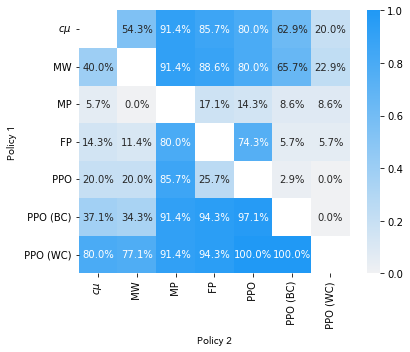

In [72]:
import numpy as np
import seaborn as sns

# Get unique policies
policies = mean_df.columns[1:]

# Create a matrix to store pairwise win rates
win_rates = np.zeros((len(policies), len(policies)))

# Compute pairwise win rates
for i, policy1 in enumerate(policies):
    for j, policy2 in enumerate(policies):
        if i != j:
            policy1_wins = np.sum(mean_df[policy1] < mean_df[policy2])
            win_rates[i, j] = policy1_wins / len(networks)  # Store as decimal values
        else:
            win_rates[i, j] = np.nan  # Set diagonal elements to NaN

# Create a custom colormap with transparency
cmap = sns.light_palette("#2099F5", as_cmap=True)

# Create a heatmap using seaborn
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(win_rates, annot=True, cmap=cmap, xticklabels=policies, yticklabels=policies, ax=ax, mask=np.eye(len(policies), dtype=bool), fmt='.1%')  # Update format to display percentages with one decimal place
# ax.set_title('Pairwise Policy Win Rates', fontproperties=font)
ax.set_xlabel('Policy 2', fontproperties=font)  
ax.set_ylabel('Policy 1', fontproperties=font)
plt.tight_layout()
plt.savefig('winrate_heatmap_largerfont.pdf')
plt.show()

